# Worksheet

[FORM](https://forms.gle/xkYAwSmeGbbE1jNM9)

### K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

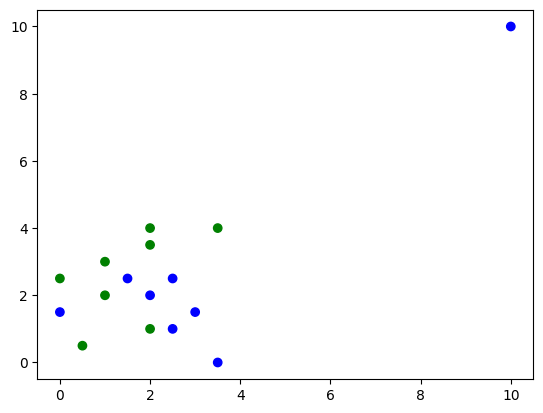

In [4]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(np.array(data["Attribute A"]), np.array(data["Attribute B"]), color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

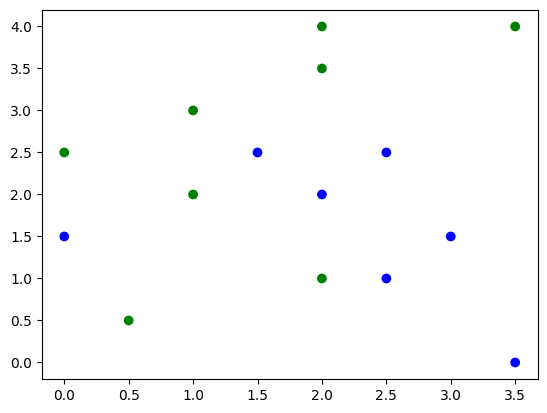

In [10]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(np.array(data["Attribute A"]), np.array(data["Attribute B"]), color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Points that could be considered noise points are Class A: (0, 1.5) and Class B: (3.5, 4.0) also A: (1.5, 2.5) or B: (2.0,1.0)

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

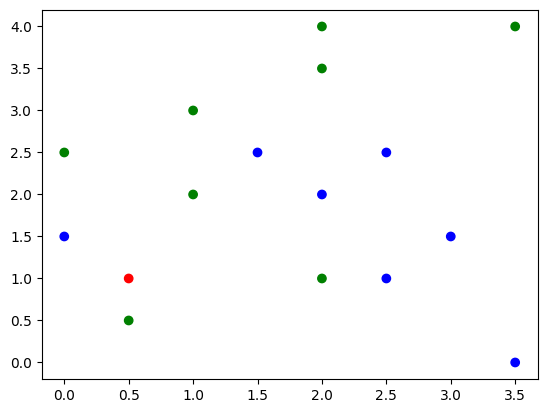

In [9]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 0.5],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 1],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(np.array(data["Attribute A"]), np.array(data["Attribute B"]), color=colors[data["Class"]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

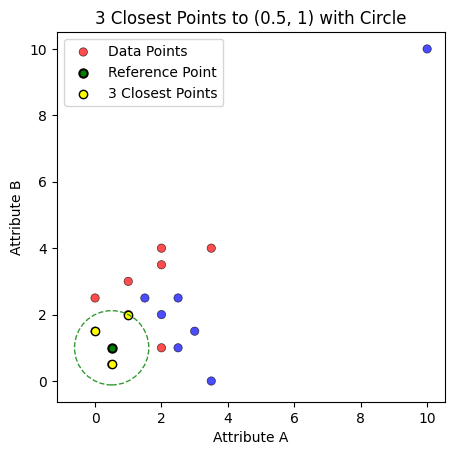

In [19]:
import pandas as pd
data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

def n_closest_to(example, n):
    example_x, example_y = example

    # Calculate Euclidean distances from the example point to each point in the dataset
    df['Distance'] = np.sqrt((df["Attribute A"] - example_x) ** 2 + (df["Attribute B"] - example_y) ** 2)

    # Get the n closest points sorted by distance
    closest_points = df.nsmallest(n, 'Distance')
    
    # Determine the radius as the distance to the farthest of these n points
    radius = closest_points['Distance'].max()

    return closest_points[['Attribute A', 'Attribute B', 'Class', 'Distance']], radius


# Specify the reference point (e.g., (2, 2))
location = (0.5, 1)
n = 3

# Get the closest points and the radius
closest_points, radius = n_closest_to(location, n)

# Plot the data points and the circle
_, axes = plt.subplots()
colors = np.array(['b', 'r'])
axes.scatter(df['Attribute A'], df['Attribute B'], color=colors[df['Class']], alpha=0.7, edgecolors='k', linewidth=0.5)

# Highlight the reference point
axes.scatter([location[0]], [location[1]], color='g', edgecolors='k', linewidth=1.5, label='Reference Point')

# Highlight the 3 closest points in a different color (e.g., yellow)
axes.scatter(closest_points['Attribute A'], closest_points['Attribute B'], color='yellow', edgecolors='k', linewidth=1, label='3 Closest Points')

# Draw the circle with the computed radius
cir = plt.Circle(location, radius, fill=False, color='g', alpha=0.8, linestyle='--')
axes.add_patch(cir)

# Add labels and legend
axes.set_xlabel("Attribute A")
axes.set_ylabel("Attribute B")
axes.set_title(f"{n} Closest Points to {location} with Circle")
axes.legend(["Data Points", "Reference Point", "3 Closest Points"])
axes.set_aspect('equal')  # Make sure the circle isn't distorted

# Show the plot
plt.show()




f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [20]:
import matplotlib.pyplot as plt
from collections import Counter

def majority_class(closest_points, default_class=0):
    # Count occurrences of each class
    class_counts = Counter(closest_points['Class'])
    
    # Find the class with the maximum count
    majority_class = class_counts.most_common(1)[0][0]

    # If there's a tie, `most_common` sorts by frequency and then value, so the first is returned.
    # Thus, it's deterministic without additional checks, using the `default_class` as a fallback if needed.
    
    return majority_class

location = (0.5, 1)
n = 3

# Get the closest points and the radius
closest_points, radius = n_closest_to(location, n)

# Get the majority class of the 3 closest points
assigned_class = majority_class(closest_points)

# Print the result
print(f"The class assigned to the point {location} based on its 3 closest points is: {assigned_class}")

The class assigned to the point (0.5, 1) based on its 3 closest points is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [23]:
# Leave-One-Out Cross-Validation (LOOCV)
count = 0
n = 3  # Number of closest neighbors to consider

for i in range(len(df)):
    # Extract the test point and actual class
    test_point = (df.loc[i, "Attribute A"], df.loc[i, "Attribute B"])
    actual_class = df.loc[i, "Class"]
    
    # Temporarily remove the test point from the DataFrame for the training set
    training_set = df.drop(i).copy()
    
    # Call n_closest_to using the test point but with the distances calculated from the whole DataFrame.
    # Then filter out distances that involve the test point.
    closest_points, _ = n_closest_to(test_point, n)
    closest_points = closest_points[closest_points.index != i]

    # Get the majority class of the closest points
    prediction = majority_class(closest_points)

    # Check if the prediction is correct
    if prediction == actual_class:
        count += 1

# Calculate the overall accuracy
overall_accuracy = count / len(df)
print(f"Overall accuracy = {overall_accuracy:.2f}")

Overall accuracy = 0.44
